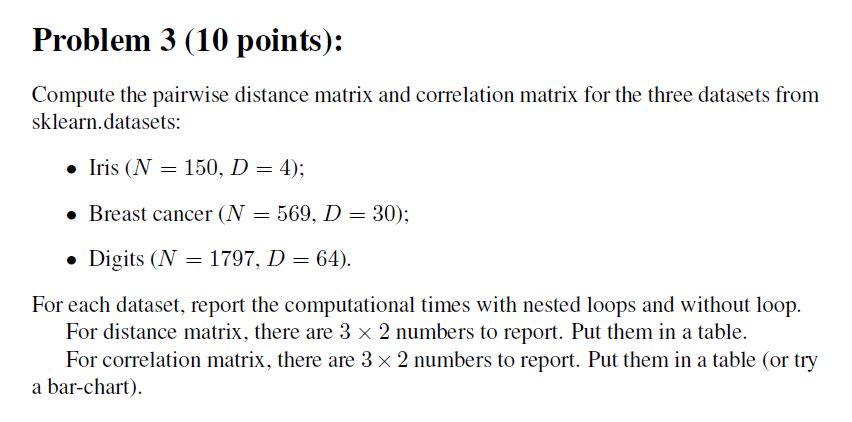

In [86]:
import numpy as np
import time
import matplotlib.pyplot as plt

iter_n = 10
ncols = 10
np.random.seed(2021)

# create a matrix with random integers
def createX(m, n):
  # m is the number of rows in the matrix, corresponding to the number of instances
  # n is the number of columns in the matrix, corresponding to the number of features
  # a mxn matrix would be return
  return np.random.randint(100, size=(m, n))


# calculate the Euclidean Distance Matrix by nested loop
def ED_loop(A, B):
  m1 = A.shape[0]   # the number of rows of matrix A
  m2 = B.shape[0]   # the number of rows of matrix B
  n1 = A.shape[1]   # the number of columns of matrix A
  n2 = B.shape[1]   # the number of columns of matrix B
  if n1 != n2:
    raise Exception("The numbers of columns between two inputed matrices doen't match!")
  Z = np.zeros((m1, m2))

  for i in range(m1):
    for j in range(m2):
      Z[i, j] = np.sqrt(sum([(A[i, k] - A[j, k])**2 for k in range(n1)]))

  return np.nan_to_num(Z)


# calculate the Euclidean Distance Matrix by vectorization operations
def ED_vec(A, B):
  # A, B is the two matrices to be calculated the distance between them
  # return the Euclidean Distance Matrix
  p1 = np.sum(A**2, axis=1)[:, np.newaxis]
  p2 = np.sum(B**2, axis=1)
  p3 = -2*np.dot(A, B.T)
  return np.nan_to_num(np.sqrt(p1+p2+p3))


def corr_loop(X):
  n = X.shape[1]              # the number of columns in matrix X
  S = np.zeros((n, n))        # initialize covariation matrix S
  # calculate columne mean of X
  u = np.zeros((1, n))
  for k in range(n):
    u[0, k] = np.mean(X[:, k])
  # calculate the covariation matrix and standard deviation
  sd = np.zeros((1, n))       # initialize the standard deviation matrix
  for i in range(n):
    for j in range(n):
      for m in range(X.shape[0]):
        S[i,j] += (X[m, i] - u[0, i])*(X[m, j] - u[0, j])
      S[i,j] /= (n-1)
      if i == j:                       # on the diagonal of the matrix
        sd[0,i] = np.sqrt(S[i, j])     # calculate the standard deviations
  # initialize correlation matrix R
  R = np.zeros((n, n))
  # calculate the correlation matrix
  for i in range(n):
    for j in range(n):
      R[i,j] = S[i,j]/(sd[0, i]*sd[0, j])
  return np.nan_to_num(R)


def corr_vec(X):
  # this function calculate the correlation matrix by matrix operations
  # instead of nesting loops
  n = X.shape[1]              # the number of columns in matrix X
  u = np.mean(X, axis=0)      # u is the column means
  dev = X-u                   # dev is the deviations, xi-column_mean
  S = np.dot(dev.transpose(), dev)   # S is the covariance matrix
  sd = np.sqrt(np.diagonal(S))       # sd is the standard diviation matrix
  sd = np.reshape(sd, (-1, sd.shape[0]))
  R = (S/sd)/np.transpose(sd)        # R is the correlation matrix 
  return np.nan_to_num(R)

In [87]:
# load and transform the data sets
import sklearn.datasets as ds 
iris = ds.load_iris()
bc = ds.load_breast_cancer()
digits = ds.load_digits()
X_iris = iris.data
X_bc = bc.data
X_digits = digits.data

In [107]:
#data_sets = (X_iris, X_bc, X_digits)
perf_ed_loop = []
perf_ed_vec = []
perf_corr_loop = []
perf_corr_vec = []
n = 0
for dataset in (X_iris, X_bc, X_digits):
    n += 1
    print(n)
    begin_t = time.time()
    Z_loop = ED_loop(dataset, dataset)
    end_t = time.time()
    perf_ed_loop.append(end_t-begin_t)

    begin_t = time.time()
    Z_vec = ED_vec(dataset, dataset)
    end_t = time.time()
    perf_ed_vec.append(end_t-begin_t)

    begin_t = time.time()
    R_loop = corr_loop(dataset)
    end_t = time.time()
    perf_corr_loop.append(end_t-begin_t)

    begin_t = time.time()
    R_vec = corr_vec(dataset)
    end_t = time.time()
    perf_corr_vec.append(end_t-begin_t)  


from tabulate import tabulate as tb
print('Comparing Distance Computation Methods')
print(tb({'Data Set':['Iris', 'Breast cancer', 'Digits'], 'Loop(s)': perf_ed_loop, 'Matrix(s)': perf_ed_vec}, headers="keys", tablefmt='fancy_grid'))

print("\n\n", 'Comparing Correlation Computation Methods')
print(tb({'Data Set':['Iris', 'Breast cancer', 'Digits'], 'Loop(s)': perf_corr_loop, 'Matrix(s)': perf_corr_vec}, headers="keys", tablefmt='fancy_grid'))


1
2


d:\program files\python37\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in sqrt


3
Comparing Distance Computation Methods
╒═══════════════╤═══════════╤═════════════╕
│ Data Set      │   Loop(s) │   Matrix(s) │
╞═══════════════╪═══════════╪═════════════╡
│ Iris          │     0.191 │  0.00599885 │
├───────────────┼───────────┼─────────────┤
│ Breast cancer │    11.931 │  0.00699997 │
├───────────────┼───────────┼─────────────┤
│ Digits        │   237.26  │  0.0739992  │
╘═══════════════╧═══════════╧═════════════╛


 Comparing Correlation Computation Methods
╒═══════════════╤═════════════╤═════════════╕
│ Data Set      │     Loop(s) │   Matrix(s) │
╞═══════════════╪═════════════╪═════════════╡
│ Iris          │  0.00299931 │ 0           │
├───────────────┼─────────────┼─────────────┤
│ Breast cancer │  0.799      │ 0.000999689 │
├───────────────┼─────────────┼─────────────┤
│ Digits        │ 13.549      │ 0.000999928 │
╘═══════════════╧═════════════╧═════════════╛


d:\program files\python37\lib\site-packages\ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in double_scalars
d:\program files\python37\lib\site-packages\ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in true_divide
